<strong><font size = "4" color = "black">Introdução à Ciência de Dados</font></strong><br>
<font size = "3" color = "gray">Prof. Valter Moreno</font><br>
<font size = "3" color = "gray">2022</font><br>  

<hr style="border:0.1px solid gray"> </hr>
<font size = "5" color = "black">Introdução ao Python</font><p>
    <font size = "5" color = "black">Aula 10: Machine Learning com <i>scikit-learn</i></font>
<hr style="border:0.1px solid gray"> </hr>

O pacote *open-source* `scikit-learn` é um dos mais utilizados para a implementação de técnicas de Machine Learning (ML) em Python. Ele inclui uma variedade de ferramentas para o preprocessamento de dados e para o treinamento, avaliação e seleção de modelos. Sua documentação oficial é extensa, e inclui diversos tutoriais sobre suas aplicações:

 - [scikit-learn.org](https://scikit-learn.org/stable/index.html)
 - [scikit-learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
 - [scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
 
Mais recursos podem ser encontrados nos seguintes websites:
 
 - [Scikit Learn - Introduction](https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm)
 - [Python Machine Learning: Scikit-Learn Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# Definição do número de casas decimais no pandas
pd.options.display.float_format = '{:,.2f}'.format

# Definição do número de casas decimais no numpy
np.set_printoptions(precision = 2)

# *Datasets*

O `scikit-learn` inclui bases de dados e métodos para a carga de bases de certas fontes, e para a geração de dados sintéticos. Mais detalhes são fornecidos em [Dataset loading utilities](https://scikit-learn.org/stable/datasets.html). Seguem exemplos.

In [2]:
from sklearn import datasets

Os métodos do tipo `load_` retornam como resultado um objeto do tipo *bunch*, que é um dicionário com chaves para os atributos ou *features* $X$ (*data*), os valores a serem previstos $y$ (*target*), e outras informações sobre o *dataset*.

In [3]:
# Exemplos de bases simples (toy datasets):
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.get('data')[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
iris.get('target')[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
print(iris.get('DESCR'))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Os métodos podem também gerar *dataframes* do `pandas`:

In [8]:
iris = datasets.load_iris(as_frame = True)
iris.get('frame').head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


In [9]:
# Deleção do objeto criado:
del(iris)

Os métodos do tipo `fetch_` carregam bases de dados reais, baixando-as da internet quando necessário.

In [10]:
housing = datasets.fetch_california_housing(as_frame = True)
print(housing.get('DESCR'))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
housing.get('frame').head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [12]:
del(housing)

O `scikit-learn` inclui métodos para carregar dados de fontes externas, como o repositório [OpenML](https://openml.org). Note que o método inclui um parâmetro (*data_home*) para definir o diretório em que os dados serão guardados. 

In [13]:
marketing = datasets.fetch_openml(data_id = 1461,
                                  target_column = "Class",
                                  as_frame = True)

In [14]:
print(marketing.get('DESCR'))

**Author**: Paulo Cortez, Sérgio Moro
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
**Please cite**: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.       

**Bank Marketing**  
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute information  
For more information, read [Moro et al., 2011].

Input variables:

- bank client data:

1 - age (numeric) 

2 - job : type of job (categorical

In [15]:
marketing.get('frame').head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.00,management,married,tertiary,no,"2,143.00",yes,no,unknown,5.00,may,261.00,1.00,-1.00,0.00,unknown,1
1,44.00,technician,single,secondary,no,29.00,yes,no,unknown,5.00,may,151.00,1.00,-1.00,0.00,unknown,1
2,33.00,entrepreneur,married,secondary,no,2.00,yes,yes,unknown,5.00,may,76.00,1.00,-1.00,0.00,unknown,1
3,47.00,blue-collar,married,unknown,no,"1,506.00",yes,no,unknown,5.00,may,92.00,1.00,-1.00,0.00,unknown,1
4,33.00,unknown,single,unknown,no,1.00,no,no,unknown,5.00,may,198.00,1.00,-1.00,0.00,unknown,1


In [16]:
del(marketing)

# Elementos básicos

Os principais tipos de elemento de *Machine Learning* (ML) implementados no `scikit-learn` são os *estimadores* (*estimators*) e os *preprocessadores* (*pre-processors*). *Preprocessadores* são usados para transformar os dados que serão fornecidos para os algoritmos de ML implementados em *estimadores*.

*Preprocessadores* incluem dois métodos básicos: `fit` e `transform`. O método `fit` define a transformação a ser realizada, e o método `transform` a aplica aos dados.

*Estimadores* incluem os métodos básicos `fit` e `predict`. O primeiro é usado para treinar modelos, e o segundo, para fazer previsões.

Os dois tipos de elementos podem ser encadeados em objetos do tipo *pipeline*, que também incluem os métodos `fit` e `predict`.

# Bases de treinamento e teste

Normalmente, os dados obtidos para gerar modelos de ML devem ser divididos em bases de treinamento e teste. O `scikit-learn` inclui métodos para esse propósito, como `train_test_split`.

In [17]:
X, y = datasets.fetch_california_housing(return_X_y = True)

In [18]:
print(f"Dimensões de X: {X.shape}\nDimensões de y: {y.shape}")

Dimensões de X: (20640, 8)
Dimensões de y: (20640,)


In [19]:
# Geração das bases de treinamento e teste:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .25,
                                                    random_state = 42)

In [20]:
print("Bases de treinamento:")
print(f"Dimensões de X: {X_train.shape}\nDimensões de y: {y_train.shape}\n")
print("Bases de teste:")
print(f"Dimensões de X: {X_test.shape}\nDimensões de y: {y_test.shape}")

Bases de treinamento:
Dimensões de X: (15480, 8)
Dimensões de y: (15480,)

Bases de teste:
Dimensões de X: (5160, 8)
Dimensões de y: (5160,)


O mesmo método pode ser aplicado a *dataframes* do `pandas`.

In [21]:
dados = datasets.fetch_california_housing(as_frame = True).get('frame')
dados_train, dados_test = train_test_split(dados, test_size = .25)

In [22]:
dados_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50


In [23]:
dados_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2654,3.08,52.00,6.19,1.04,"1,152.00",2.65,40.54,-124.23,1.07
4509,2.29,50.00,3.65,1.04,"1,526.00",3.96,34.05,-118.20,1.22
17373,4.82,24.00,6.63,1.00,"1,171.00",2.84,34.96,-120.43,1.63
15861,3.71,52.00,5.69,1.16,"1,645.00",2.76,37.76,-122.39,2.54
8199,3.48,23.00,4.26,1.14,"1,478.00",2.45,33.79,-118.14,2.09


# Transformação de dados

Muitos algoritmos de ML requerem dados de um certo tipo ou em um certo formato ou escala. Por exemplo:

 - regressões lineares não aceitam variáveis do tipo *string* como preditores ou variável dependente; 
 - quando métodos de regularização são usados, deve-se transformar todos os preditores para que sejam medidos numa mesma escala;
 - de forma geral, recomenda-se a detecção e tratamento de *mising data* (dados faltando ou omitidos) e *outliers* (observações atípicas), e a eliminação de variáveis redundantes ou que variem pouco (contenham pouca informação).

O `scikit-learn` implementa em objetos preprocessadores (*pre-processors*) uma variedade de tipos de transformação e seleção de variáveis. Aqui, veremos alguns exemplos. Para mais informações, consulte os tópicos [Dataset transformations](https://scikit-learn.org/stable/data_transforms.html) e [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html) no [Guia do Usuário](https://scikit-learn.org/stable/user_guide.html). Além disso, a seção [FeatureUnion: composite feature spaces](https://scikit-learn.org/stable/modules/compose.html#featureunion-composite-feature-spaces) descreve como preprocessadores podem ser executados em paralelo, e seus resultados, combinados.

Vamos usar a base de dados de treinamento obtida da base *California Housing*.

In [24]:
dados_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50


In [25]:
dados_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,"15,480.00","15,480.00","15,480.00","15,480.00","15,480.00","15,480.00","15,480.00","15,480.00","15,480.00"
mean,3.86,28.65,5.42,1.10,"1,423.67",2.99,35.63,-119.57,2.07
std,1.90,12.62,2.52,0.48,"1,126.39",4.23,2.14,2.00,1.15
min,0.50,1.00,1.00,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.43,1.01,784.00,2.43,33.93,-121.79,1.20
50%,3.53,29.00,5.22,1.05,"1,164.00",2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,"1,724.00",3.28,37.72,-118.01,2.65
max,15.00,52.00,141.91,34.07,"35,682.00",502.46,41.95,-114.31,5.00


## Eliminação de variáveis com baixa variância

In [26]:
from sklearn.feature_selection import VarianceThreshold

# Definição do preprocessador com o valor mínimo de variância:
low_var = VarianceThreshold(threshold = 5.0)

In [27]:
# Base sem variáveis com baixa variância:
low_var.fit_transform(dados_train.loc[:, "MedInc":"Longitude"])

array([[  26.  ,    4.88,  494.  ,    3.07],
       [  36.  ,    4.9 ,  625.  ,    2.74],
       [  36.  ,    5.48, 1011.  ,    2.58],
       ...,
       [  38.  ,    3.81, 1225.  ,    3.86],
       [  19.  ,    5.02, 1052.  ,    2.46],
       [  42.  ,    3.22,  157.  ,    3.14]])

In [28]:
# Variáveis mantidas:
low_var.get_feature_names_out()

array(['HouseAge', 'AveRooms', 'Population', 'AveOccup'], dtype=object)

In [29]:
# Variâncias das variáveis:
pd.DataFrame({"Variáveis": low_var.feature_names_in_, 
              "Variâncias": low_var.variances_})

,Variáveis,Variâncias
0,MedInc,3.61
1,HouseAge,159.26
2,AveRooms,6.34
3,AveBedrms,0.23
4,Population,"1,268,682.20"
5,AveOccup,17.87
6,Latitude,4.57
7,Longitude,4.01


## Eliminação de variáveis pouco relacionadas com o resultado

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [31]:
# Método f_regression:
not_related = SelectKBest(score_func = f_regression, k = "all")
not_related.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"],
                          y = dados_train.loc[:, "MedHouseVal"])

array([[   2.36,   26.  ,    4.88, ...,    3.07,   39.23, -123.2 ],
       [   3.78,   36.  ,    4.9 , ...,    2.74,   37.69, -122.16],
       [   3.22,   36.  ,    5.48, ...,    2.58,   33.85, -117.93],
       ...,
       [   1.47,   38.  ,    3.81, ...,    3.86,   34.11, -117.31],
       [   3.5 ,   19.  ,    5.02, ...,    2.46,   36.48, -121.7 ],
       [   2.2 ,   42.  ,    3.22, ...,    3.14,   33.81, -117.99]])

In [32]:
pd.DataFrame({"Variáveis": not_related.feature_names_in_,
              "Scores": not_related.scores_,
              "Valor-p": not_related.pvalues_})

,Variáveis,Scores,Valor-p
0,MedInc,"13,927.68",0.00
1,HouseAge,203.14,0.00
2,AveRooms,358.59,0.00
3,AveBedrms,29.09,0.00
4,Population,8.91,0.00
5,AveOccup,26.32,0.00
6,Latitude,319.80,0.00
7,Longitude,33.68,0.00


In [33]:
# Seleção das k melhores variáveis:
not_related.set_params(**{"k": 5})

SelectKBest(k=5, score_func=<function f_regression at 0x0000029A51AE0DC0>)

In [34]:
not_related.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"],
                          y = dados_train.loc[:, "MedHouseVal"])

array([[   2.36,   26.  ,    4.88,   39.23, -123.2 ],
       [   3.78,   36.  ,    4.9 ,   37.69, -122.16],
       [   3.22,   36.  ,    5.48,   33.85, -117.93],
       ...,
       [   1.47,   38.  ,    3.81,   34.11, -117.31],
       [   3.5 ,   19.  ,    5.02,   36.48, -121.7 ],
       [   2.2 ,   42.  ,    3.22,   33.81, -117.99]])

In [35]:
not_related.get_feature_names_out()

array(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude'],
      dtype=object)

In [36]:
# Método mutual_info_regression:
not_related = SelectKBest(score_func = mutual_info_regression, k = 5)
not_related.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"],
                          y = dados_train.loc[:, "MedHouseVal"])

array([[   2.36,    4.88,    3.07,   39.23, -123.2 ],
       [   3.78,    4.9 ,    2.74,   37.69, -122.16],
       [   3.22,    5.48,    2.58,   33.85, -117.93],
       ...,
       [   1.47,    3.81,    3.86,   34.11, -117.31],
       [   3.5 ,    5.02,    2.46,   36.48, -121.7 ],
       [   2.2 ,    3.22,    3.14,   33.81, -117.99]])

In [37]:
not_related.get_feature_names_out()

array(['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'],
      dtype=object)

## Eliminação recursiva de variáveis com validação cruzada

In [38]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
sel_vars = RFECV(regr, cv = 5)
sel_vars.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"],
                       y = dados_train.loc[:, "MedHouseVal"])

C:\Users\valte\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


array([[   2.36,    1.04,   39.23, -123.2 ],
       [   3.78,    0.96,   37.69, -122.16],
       [   3.22,    1.06,   33.85, -117.93],
       ...,
       [   1.47,    1.01,   34.11, -117.31],
       [   3.5 ,    1.12,   36.48, -121.7 ],
       [   2.2 ,    0.8 ,   33.81, -117.99]])

In [39]:
sel_vars.get_feature_names_out()

array(['MedInc', 'AveBedrms', 'Latitude', 'Longitude'], dtype=object)

## Padronização

In [40]:
from sklearn.preprocessing import StandardScaler

padr = StandardScaler()
dados_padr = padr.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"])
dados_padr

array([[-0.79, -0.21, -0.21, ...,  0.02,  1.68, -1.81],
       [-0.04,  0.58, -0.2 , ..., -0.06,  0.96, -1.29],
       [-0.34,  0.58,  0.02, ..., -0.1 , -0.83,  0.82],
       ...,
       [-1.26,  0.74, -0.64, ...,  0.21, -0.71,  1.13],
       [-0.19, -0.76, -0.16, ..., -0.12,  0.4 , -1.06],
       [-0.88,  1.06, -0.87, ...,  0.04, -0.85,  0.79]])

In [41]:
pd.DataFrame({"Variáveis": dados_train.columns[:-1],
              "Médias originais": padr.mean_,
              "Desvios-padrão": padr.scale_,
              "Novas médias": np.mean(dados_padr, axis = 0),
              "Novos desvios": np.std(dados_padr, axis = 0)})

,Variáveis,Médias originais,Desvios-padrão,Novas médias,Novos desvios
0,MedInc,3.86,1.90,-0.00,1.00
1,HouseAge,28.65,12.62,-0.00,1.00
2,AveRooms,5.42,2.52,0.00,1.00
3,AveBedrms,1.10,0.48,0.00,1.00
4,Population,"1,423.67","1,126.36",0.00,1.00
5,AveOccup,2.99,4.23,-0.00,1.00
6,Latitude,35.63,2.14,0.00,1.00
7,Longitude,-119.57,2.00,-0.00,1.00


## MinMax

In [42]:
from sklearn.preprocessing import MinMaxScaler

padr = MinMaxScaler()
dados_minmax = padr.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"])
dados_minmax

array([[0.13, 0.49, 0.03, ..., 0.  , 0.71, 0.11],
       [0.23, 0.69, 0.03, ..., 0.  , 0.55, 0.22],
       [0.19, 0.69, 0.03, ..., 0.  , 0.14, 0.64],
       ...,
       [0.07, 0.73, 0.02, ..., 0.01, 0.17, 0.7 ],
       [0.21, 0.35, 0.03, ..., 0.  , 0.42, 0.26],
       [0.12, 0.8 , 0.02, ..., 0.  , 0.13, 0.63]])

In [43]:
pd.DataFrame({"Variáveis": dados_train.columns[:-1],
              "Mínimo": padr.data_min_,
              "Máximo": padr.data_max_,
              "Novo mínimo": np.min(dados_minmax, axis = 0),
              "Novo máximo": np.max(dados_minmax, axis = 0)})

,Variáveis,Mínimo,Máximo,Novo mínimo,Novo máximo
0,MedInc,0.50,15.00,0.00,1.00
1,HouseAge,1.00,52.00,0.00,1.00
2,AveRooms,1.00,141.91,0.00,1.00
3,AveBedrms,0.33,34.07,0.00,1.00
4,Population,3.00,"35,682.00",0.00,1.00
5,AveOccup,0.69,502.46,0.00,1.00
6,Latitude,32.54,41.95,0.00,1.00
7,Longitude,-124.35,-114.31,0.00,1.00


## Discretização

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretização em 5 faixas numeradas de 0 a 4, com o mesmo número
# de exemplos em cada uma:
discr = KBinsDiscretizer(n_bins = 5, 
                         encode = "ordinal",
                         strategy = "quantile")
discr.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"])

array([[1., 2., 1., ..., 3., 4., 0.],
       [2., 3., 1., ..., 2., 3., 0.],
       [2., 3., 2., ..., 1., 0., 3.],
       ...,
       [0., 3., 0., ..., 4., 2., 4.],
       [2., 1., 2., ..., 1., 2., 1.],
       [0., 4., 0., ..., 3., 0., 3.]])

In [45]:
# Discretização em 3 faixas de mesma largura, com one-hot-encoding (matriz densa):
discr = KBinsDiscretizer(n_bins = 3, 
                         encode = "onehot-dense",
                         strategy = "uniform")
dummy = discr.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"])
dummy

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [46]:
dummy.shape  # Cada variável gerou três variáveis dummy

(15480, 24)

In [47]:
# Limites das faixas:
discr.bin_edges_

array([array([ 0.5 ,  5.33, 10.17, 15.  ]), array([ 1., 18., 35., 52.]),
       array([  1.  ,  47.97,  94.94, 141.91]),
       array([ 0.33, 11.58, 22.82, 34.07]),
       array([3.00e+00, 1.19e+04, 2.38e+04, 3.57e+04]),
       array([  0.69, 167.95, 335.21, 502.46]),
       array([32.54, 35.68, 38.81, 41.95]),
       array([-124.35, -121.  , -117.66, -114.31])], dtype=object)

In [48]:
# Limites das faixas para MedInc:
discr.bin_edges_[0]

array([ 0.5 ,  5.33, 10.17, 15.  ])

In [49]:
pd.DataFrame({"MedInc": dados_train.loc[:, "MedInc"],
              "Faixa 1": dummy[:,0],
              "Faixa 2": dummy[:,1],
              "Faixa 3": dummy[:,2]}) \
  .sample(n = 10) \
  .sort_values("MedInc")

,MedInc,Faixa 1,Faixa 2,Faixa 3
9898,2.01,1.00,0.00,0.00
20455,2.71,1.00,0.00,0.00
8827,2.88,1.00,0.00,0.00
18765,2.88,1.00,0.00,0.00
5390,2.93,1.00,0.00,0.00
9278,3.81,1.00,0.00,0.00
10219,4.50,1.00,0.00,0.00
12107,4.71,1.00,0.00,0.00
14493,5.21,1.00,0.00,0.00
8569,5.41,0.00,1.00,0.00


## *Missing Data*

Vamos remover aleatoriamente alguns dados da base de treinamento obtida do *dataset* *California Housing*.

In [50]:
n_obs, n_features = dados_train.loc[:, "MedInc":"Longitude"].shape
print(f"Número de exemplos: {n_obs}")
print(f"Número de features: {n_features}")

Número de exemplos: 15480
Número de features: 8


In [51]:
linhas = np.arange(n_obs)
faltando = np.random.choice(n_features, n_obs, replace = True)
dados_train_missing = np.array(dados_train.copy())
dados_train_missing[linhas, faltando] = np.nan
dados_train_missing = pd.DataFrame(dados_train_missing, columns = dados_train.columns)
dados_train_missing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,NaN,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
1,3.78,NaN,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
2,NaN,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
3,7.44,18.00,8.45,1.36,NaN,2.58,32.83,-117.24,4.46
4,1.15,32.00,5.10,1.17,242.00,2.78,NaN,-118.99,1.50


Há várias formas de tratar dados omitidos em um *dataset*. Para variáveis numéricas, pode substituir os valores pela média, mediana ou moda da coluna (não é recomendável), ou tentar imputar os valores a partir das informações contidas nas outras variáveis. Esta estratégia gera bons resultados se há uma boa correlação entre a coluna com dados omitidos e as demais colunas. 

A seguir, mostramos como podemos implementar uma susbtituição de valores omitidos a partir das informações contidas em outras colunas, por meio do método `IterativeImputer`. Mais informações podem ser obtidas em [Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation).

In [52]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(estimator = BayesianRidge(),
                       missing_values = np.nan,
                       sample_posterior = False,
                       max_iter = 10, 
                       random_state=0)

dados_imputed = imp.fit_transform(dados_train_missing.loc[:, "MedInc":"Longitude"])
pd.DataFrame(dados_imputed, columns = dados_train.columns[:-1]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.19,26.00,4.88,1.04,494.00,3.07,39.23,-123.20
1,3.78,51.51,4.90,0.96,625.00,2.74,37.69,-122.16
2,4.23,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93
3,7.44,18.00,8.45,1.36,"1,826.00",2.58,32.83,-117.24
4,1.15,32.00,5.10,1.17,242.00,2.78,36.55,-118.99


Como, neste caso, simulamos os dados omitidos, ou seja, conhecemos os valores originais no *dataset*, podemos avaliar o quanto as imputações estão próximas dos verdadeiros valores.

In [53]:
valores = pd.DataFrame({"Valores originais": np.array(dados_train)[linhas, faltando],
                        "Valores imputados": dados_imputed[linhas, faltando],})
valores["Diferença %"] = (valores["Valores imputados"] - valores["Valores originais"]) / valores["Valores originais"]
valores.sort_values("Diferença %")

,Valores originais,Valores imputados,Diferença %
3631,55.00,"-22,283.93",-406.16
8508,36.00,"-13,525.96",-376.72
12911,29.00,"-8,844.60",-305.99
4402,32.00,"-9,204.58",-288.64
15186,82.00,"-17,471.17",-214.06
...,...,...,...
9067,43.00,"7,031.62",162.53
3612,29.00,"5,586.79",191.65
10424,36.00,"11,478.57",317.85
13268,14.00,"4,832.43",344.17


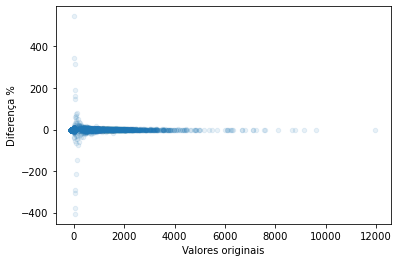

In [54]:
valores.plot("Valores originais", "Diferença %", kind = "scatter", alpha = .1);

De acordo com a tabela e o gráfico, houve diferenças substanciais, especialmente para valores originais de menor magnitude. No entanto, o histograma a seguir mostra que a vasta maioria das imputações foram próximas dos valores originais.

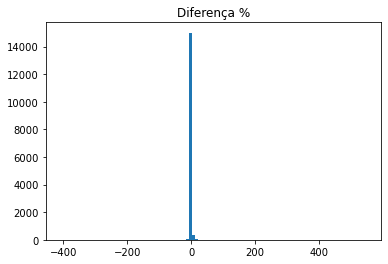

In [55]:
valores.hist("Diferença %", grid = False, bins = 100);

## *Outliers*

A detecção e o tratamento de valores atípicos é um passo importante do processo de preprocessamento de dados. Dados atípicos podem influenciar exageradamente a estimação dos parâmetros do modelo, piorando o seu desempenho quando for aplicado a novos dados.

Há dois tipos básicos de detecção de *outliers*: 
 
 - métodos univariados, que analisam a distribuição dos valores numa única variável, verificando discrepâncias; e
 - métodos multivariados, que consideram a distribuição conjunta de valores em todas as variáveis simultaneamente.
 
Ambos os tipos são implementados no `scikit-learn`. A figura abaixo mostra exemplos de identificação de *outliers* com métodos implementados no pacote. Para mais informações, consulte [Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html) e [Comparing anomaly detection algorithms for outlier detection on toy datasets](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_anomaly_comparison_001.png" width="500px"></br>
<i>Fonte</i>: https://scikit-learn.org/stable/modules/outlier_detection.html

Vamos considerar os dados selecionados para treinamento do *dataset* *California Housing*. Os plots de algumas variáveis contra a variável a ser prevista, *MedHouseVal*, sugerem a presença de *outliers*. No entanto, sua detecção visual não é simples. Além disso, o processo de detecção deve levar em conta todos os *features* simultaneamente. 

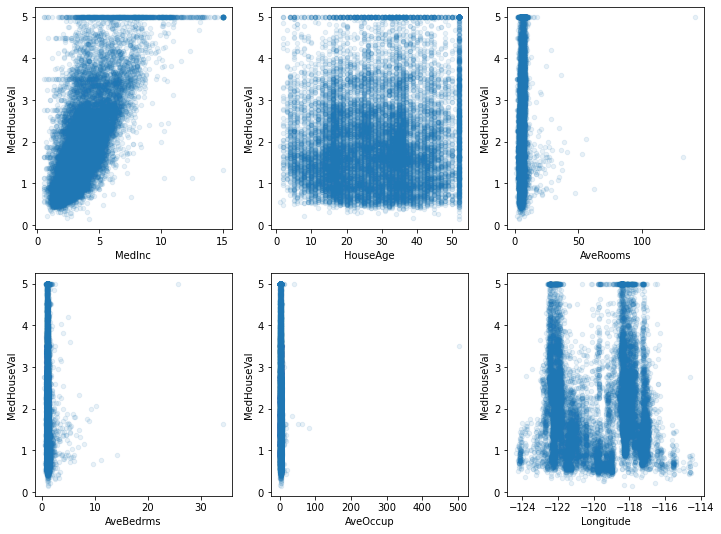

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3, figsize = (12, 9))

dados_train.plot("MedInc", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,0])
dados_train.plot("HouseAge", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,1])
dados_train.plot("AveRooms", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,2])
dados_train.plot("AveBedrms", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,0])
dados_train.plot("AveOccup", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,1])
dados_train.plot("Longitude", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,2]);

Vamos utilizar um dos métodos implementados no `scikit-learn`, chamado *Isolation Forest*, para identificar outliers considerando todas as dimensões da nossa amostra.

In [57]:
from sklearn.ensemble import IsolationForest

dados_train_out = dados_train.copy()

dados_train_out["Outlier"] = IsolationForest(contamination = .01) \
                             .fit_predict(np.array(dados_train))
dados_train_out

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Outlier
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05,1
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92,1
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97,1
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46,1
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50,1
...,...,...,...,...,...,...,...,...,...,...
9049,2.85,6.00,8.10,1.43,"1,543.00",2.74,34.70,-118.09,1.39,1
4809,1.34,47.00,3.79,1.10,"1,349.00",2.66,34.03,-118.34,1.25,1
13551,1.47,38.00,3.81,1.01,"1,225.00",3.86,34.11,-117.31,0.64,1
9764,3.50,19.00,5.02,1.12,"1,052.00",2.46,36.48,-121.70,2.88,1


In [58]:
print(f"Número de outliers detectados: {dados_train_out['Outlier'].value_counts().iloc[-1]}")

Número de outliers detectados: 155


Após a detecção de uma observação atípica, deve-se definir como será tratada. Quando a base de dados é suficientemente grande, geralmente a observação é excluída.

In [59]:
dados_train_out = dados_train_out.loc[dados_train_out["Outlier"] == 1, :].copy()
dados_train_out.drop("Outlier", axis = 1, inplace = True)
dados_train_out

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50
...,...,...,...,...,...,...,...,...,...
9049,2.85,6.00,8.10,1.43,"1,543.00",2.74,34.70,-118.09,1.39
4809,1.34,47.00,3.79,1.10,"1,349.00",2.66,34.03,-118.34,1.25
13551,1.47,38.00,3.81,1.01,"1,225.00",3.86,34.11,-117.31,0.64
9764,3.50,19.00,5.02,1.12,"1,052.00",2.46,36.48,-121.70,2.88


Após a deleção dos outliers, os gráficos parecem ter ficados "mais limpos". 

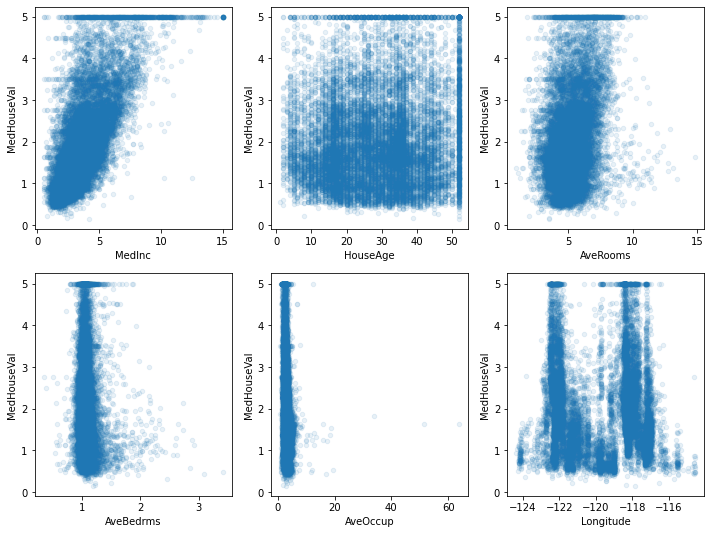

In [60]:
fig, axes = plt.subplots(2,3, figsize = (12, 9))

dados_train_out.plot("MedInc", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,0])
dados_train_out.plot("HouseAge", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,1])
dados_train_out.plot("AveRooms", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[0,2])
dados_train_out.plot("AveBedrms", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,0])
dados_train_out.plot("AveOccup", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,1])
dados_train_out.plot("Longitude", "MedHouseVal", kind="scatter", alpha = .1, ax = axes[1,2]);

## Transformações de grupos de colunas

*Dataframes* geralmente contém colunas de diversos tipos de dados. Mesmo quando todas as colunas são de um mesmo tipo, é possível que seja necessário aplicar certas transformações a algumas delas, e não a outras.

O elemento *ColumnTransformer* `scikit-learn` permite que se defina transformações diferentes para cada coluna ou grupo de colunas de uma base de dados. A seguir, mostramos alguns exemplos de aplicações. Mais informações podem ser obtidas em [ColumnTransformer for heterogeneous data](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data).

In [61]:
dados_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50


Vamos aplicar algumas das transformações anteriores a grupos de colunas diferentes.

In [62]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(
    [('dscr', KBinsDiscretizer(n_bins = 3, encode = "onehot-dense",
                               strategy = "uniform"), ["Population"]),
     ('mmx', MinMaxScaler(), ["AveRooms", "AveBedrms"]),
     ('pdr', StandardScaler(), ["Latitude", "Longitude"])])

dados_train_trans = col_trans.fit_transform(dados_train)
dados_train_trans = \
    pd.DataFrame(dados_train_trans,
                 columns = col_trans.get_feature_names_out())
dados_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97
14479,7.44,18.00,8.45,1.36,949.00,2.58,32.83,-117.24,4.46
3010,1.15,32.00,5.10,1.17,242.00,2.78,35.27,-118.99,1.50


O resultado da transformação mostra que, por default, apenas as colunas especificadas são afetadas. Além disso, os nomes das colunas geradas são precedidos do nome da transformação aplicada.

O método `make_column_selector` permite que se especifique colunas com base em seu tipo ou padrão de nome.

In [63]:
dados_train_trans.loc[:, "dscr__Population_0.0":"dscr__Population_2.0"] = \
        dados_train_trans.loc[:, "dscr__Population_0.0":"dscr__Population_2.0"] \
                         .astype("category")
dados_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   dscr__Population_0.0  15480 non-null  category
 1   dscr__Population_1.0  15480 non-null  category
 2   dscr__Population_2.0  15480 non-null  category
 3   mmx__AveRooms         15480 non-null  float64 
 4   mmx__AveBedrms        15480 non-null  float64 
 5   pdr__Latitude         15480 non-null  float64 
 6   pdr__Longitude        15480 non-null  float64 
dtypes: category(3), float64(4)
memory usage: 529.6 KB


In [64]:
from sklearn.compose import make_column_selector

# Seleção por padrão nos nomes das colunas:
col_trans = ColumnTransformer([('mmx', MinMaxScaler(),
                                make_column_selector(pattern = "Ave"))])
col_trans.fit(dados_train_trans)
print("Colunas selecionadas por nome:", col_trans.get_feature_names_out(), "\n")

# Seleção por tipo de dados:
col_trans = ColumnTransformer([('pdr', StandardScaler(),
                                make_column_selector(dtype_include=np.number))])
col_trans.fit(dados_train_trans)
print("Colunas selecionadas por tipo:", col_trans.get_feature_names_out())

Colunas selecionadas por nome: ['mmx__mmx__AveRooms' 'mmx__mmx__AveBedrms'] 

Colunas selecionadas por tipo: ['pdr__mmx__AveRooms' 'pdr__mmx__AveBedrms' 'pdr__pdr__Latitude'
 'pdr__pdr__Longitude']


# Estimadores

Há um grande número de algoritmos implementados no `scikit-learn`, em seus estimadores (*estimators*). Nos exemplos anteriores, usamos o estimador de regressão linear múltipla, *LinearRegression*. A documentação do pacote descreve todos os estimadores implementados para problemas de ML [supervisionados](https://scikit-learn.org/stable/supervised_learning.html) e [não-supervisionados](https://scikit-learn.org/stable/unsupervised_learning.html).

A figura a seguir mostra um fluxograma para definir o tipo de algoritmo adequado a um dado problema de ML. 

<img src="https://scikit-learn.org/stable/_static/ml_map.png" width="1500px"></br>
<i>Fonte</i>: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Objetos de um tipo de estimador são criados instanciando-se um objeto da classe correspondente. O método de inicialização inclui parâmetros para a definição de valores dos hiperparâmetros de um algoritmo. Os hiperparâmetros podem ser alterados posteriormente por meio dos método `set_params`, que aceita como argumento um dicionário com chaves correspondentes aos hiperparâmetros do objeto criado.

Vamos usar como exemplo o estimador de regressão linear *LinearRegression*, aplicado aos dados da base *California Housing*.

In [65]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept = False, 
                        n_jobs = -1)
regr

LinearRegression(fit_intercept=False, n_jobs=-1)

In [66]:
regr.set_params(**{'fit_intercept': True,   # É necessário desempacotar
                   'n_jobs': 2})            # (unpack) o dicionário  
regr

LinearRegression(n_jobs=2)

O método `fit` é usado para treinar o estimador (modelo).

In [67]:
dados_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9492,2.36,26.00,4.88,1.04,494.00,3.07,39.23,-123.20,1.05
670,3.78,36.00,4.90,0.96,625.00,2.74,37.69,-122.16,1.92
11133,3.22,36.00,5.48,1.06,"1,011.00",2.58,33.85,-117.93,1.97


In [68]:
# Treinamento:
regr.fit(X = dados_train.loc[:, "MedInc":"Longitude"], 
         y = dados_train.loc[:, "MedHouseVal"])
pd.DataFrame({"Preditores": regr.feature_names_in_,
              "Coeficientes": regr.coef_})

,Preditores,Coeficientes
0,MedInc,0.43
1,HouseAge,0.01
2,AveRooms,-0.10
3,AveBedrms,0.62
4,Population,0.00
5,AveOccup,-0.01
6,Latitude,-0.42
7,Longitude,-0.44


A métrica de desempenho do modelo (função de perda ou *loss function*), que, no caso, é o $R^2$, é obtida com o método `score`.

In [69]:
r2 = regr.score(X = dados_train.loc[:, "MedInc":"Longitude"],
                y = dados_train.loc[:, "MedHouseVal"])
print(f"R2 no treinamento = {r2:.2f}")

R2 no treinamento = 0.61


Após o treinamento do estimador, usamos o método `predict` para gerar as previsões de $y$ com a base de teste, e o método `score` para avaliar o desempenho do modelo com os novos dados.

In [70]:
dados_test.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2654,3.08,52.00,6.19,1.04,"1,152.00",2.65,40.54,-124.23,1.07
4509,2.29,50.00,3.65,1.04,"1,526.00",3.96,34.05,-118.20,1.22
17373,4.82,24.00,6.63,1.00,"1,171.00",2.84,34.96,-120.43,1.63


In [71]:
# Previsão com a base de teste:
dados_test["PredictedVal"] = regr.predict(X = dados_test.loc[:, "MedInc":"Longitude"])
dados_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PredictedVal
2654,3.08,52.00,6.19,1.04,"1,152.00",2.65,40.54,-124.23,1.07,1.81
4509,2.29,50.00,3.65,1.04,"1,526.00",3.96,34.05,-118.20,1.22,1.80
17373,4.82,24.00,6.63,1.00,"1,171.00",2.84,34.96,-120.43,1.63,2.91
15861,3.71,52.00,5.69,1.16,"1,645.00",2.76,37.76,-122.39,2.54,2.58
8199,3.48,23.00,4.26,1.14,"1,478.00",2.45,33.79,-118.14,2.09,2.15


In [72]:
r2 = regr.score(X = dados_test.loc[:, "MedInc":"Longitude"], 
                y = dados_test.loc[:, "MedHouseVal"])
print(f"R2 no teste = {r2:.2f}")

R2 no teste = 0.59


# Validação Cruzada

O fluxo de um processo de ML típico é mostrado na figura abaixo. Nela, destaca-se o processo de validação cruzada (*cross validation*), utilizado para reduzir a variância das estimativas do desempenho de um modelo quando for aplicado a novos dados. 

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500px"></br>
<i>Fonte</i>: https://scikit-learn.org/stable/modules/cross_validation.html

A validação cruzada (*cross validation*) é uma etapa importante da geração de modelos, especialmente para a definição dos *hiperparâmetros* que definem como o algoritmo de ML irá funcionar. De fato, na figura, ela aparece antes do processo de escolha dos melhores hiperparâmetros para o algoritmo de aprendizagem.

Geralmente, a validação cruzada envolver a divisão da base de treinamento original em um ou mais pares de bases de treinamento e validação, as quais podem ser usadas para a calibragem de hiperparâmetros. Dada uma base de treinamento originalmente composta de $N$ exemplos, quando $k$ pares de bases de treinamento e validação são criados, com $N(1 - 1/k)$ e $N/k$ exemplos, repectivamente, o processo é denominado $k$*-fold cross validation*. Quando $N$ pares são criados, cada par consistindo de uma partição de treinamento com $N-1$ exemplos e uma partição de teste com um exemplo, tem-se o que chamamos de *leave-one-out cross validation*.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500px"></br>
<i>Fonte</i>: https://scikit-learn.org/stable/modules/cross_validation.html

A seção [Visualizing cross-validation behavior in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html) apresenta exemplos de diversos tipos de validação cruzada. A seguir, implementamos um *5-fold cross validation* para modelos de regressão linear gerados com a base de dados *California Housing*.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Estimador que define o algoritmo de ML a ser usado:
reg = LinearRegression()

# Geração da métrica de avaliação para os modelos obtidos no k-fold cross validation:
scores = cross_val_score(reg, 
                         dados_train.loc[:, "MedInc":"Longitude"], dados_train.loc[:, "MedHouseVal"], 
                         cv = 5)

Por default, no `scikit-learn`, o desempenho dos modelos de regressão linear é avaliado pela média do erro ao quadrado (*Mean Squared Error*):
<p>
<center>$MSE = \min_{w} || X w - y||_2^2$</center>
</p>

In [74]:
print(f"MSE obtidos: {scores}")

MSE obtidos: [6.32e-01 5.55e-01 6.05e-01 6.10e-01 5.52e-04]


In [75]:
print(f"Média dos MSE: {np.mean(scores):.2f}")
print(f"Desvio padrão dos MSE: {np.std(scores):.2f}")

Média dos MSE: 0.48
Desvio padrão dos MSE: 0.24


O parâmetro *scoring* do método `cross_val_score` é usado para definir outras [métricas de avaliação de modelos](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter), como a média dos valores absolutos dos percentuais de erro (*Mean Absolute Percentage Error*). 

In [76]:
scores = cross_val_score(reg, 
                         dados_train.loc[:, "MedInc":"Longitude"], dados_train.loc[:, "MedHouseVal"], 
                         cv = 5,
                         scoring = "neg_mean_absolute_percentage_error")

In [77]:
scores = abs(scores)
print(f"MAPE obtidos: {scores}")
print(f"Média dos MAPE: {np.mean(scores):.3f}")
print(f"Desvio padrão dos MAPE: {np.std(scores):.3f}")

MAPE obtidos: [0.31 0.33 0.31 0.32 0.31]
Média dos MAPE: 0.316
Desvio padrão dos MAPE: 0.008


O parâmetro *cv* pode ser usado para definir outras estratégias de validação cruzada, como *leave-One-Out*. Em tais casos, o parâmetro recebe o nome de um iterador (*iterator*) de validação cruzada, que gera pares de índices de exemplos da base de dados a serem usados para treinamento e teste. 

In [78]:
from sklearn.model_selection import KFold, LeaveOneOut

# Definição dos iteradores:
kf = KFold(n_splits = 3, shuffle = True)
lv = LeaveOneOut()

# Geração dos índices para o k-fold:
print("*** 3-fold Cross Validation:")
for i, (train, test) in enumerate(kf.split(dados_train)):
    print(f"Fold {i}:\nExemplos para treinamento: {train}\nExemplos para teste: {test}\n")

# Geração dos índices para LOO:
print("*** Leave-One-Out Cross Validation:")
for i, (train, test) in enumerate(lv.split(dados_train)):
    if i > 5: 
        break
    print(f"Fold {i}:\nExemplos para treinamento: {train}\nExemplos para teste: {test}\n")

*** 3-fold Cross Validation:
Fold 0:
Exemplos para treinamento: [    1     2     6 ... 15474 15475 15476]
Exemplos para teste: [    0     3     4 ... 15477 15478 15479]

Fold 1:
Exemplos para treinamento: [    0     1     3 ... 15477 15478 15479]
Exemplos para teste: [    2     8    10 ... 15471 15474 15475]

Fold 2:
Exemplos para treinamento: [    0     2     3 ... 15477 15478 15479]
Exemplos para teste: [    1     6     9 ... 15467 15473 15476]

*** Leave-One-Out Cross Validation:
Fold 0:
Exemplos para treinamento: [    1     2     3 ... 15477 15478 15479]
Exemplos para teste: [0]

Fold 1:
Exemplos para treinamento: [    0     2     3 ... 15477 15478 15479]
Exemplos para teste: [1]

Fold 2:
Exemplos para treinamento: [    0     1     3 ... 15477 15478 15479]
Exemplos para teste: [2]

Fold 3:
Exemplos para treinamento: [    0     1     2 ... 15477 15478 15479]
Exemplos para teste: [3]

Fold 4:
Exemplos para treinamento: [    0     1     2 ... 15477 15478 15479]
Exemplos para teste: [4

Os iteradores podem ser usados então nos métodos que implementam a validação cruzada, como o `cros_val_score`. Abaixo, implementamos o método *Leave-One-Out*, que consome mais recursos computacionais no caso selecionado.

In [79]:
scores = cross_val_score(reg, 
                         dados_train.loc[:, "MedInc":"Longitude"], dados_train.loc[:, "MedHouseVal"], 
                         cv = lv,
                         scoring = "neg_mean_absolute_percentage_error")

In [80]:
scores = abs(scores)
print(f"MAPE obtidos: {scores}")
print(f"Média dos MAPE: {np.mean(scores):.3f}")
print(f"Desvio padrão dos MAPE: {np.std(scores):.3f}")

MAPE obtidos: [0.4  0.22 0.05 ... 0.38 0.15 0.04]
Média dos MAPE: 0.318
Desvio padrão dos MAPE: 0.390


O método `cross_validate` é mais versátil do que o método `cross_val_score`:

 - ele permite a especificação de mais de uma métrica de avaliação de modelos; e
 - ele retorna um dicionário com mais informações sobre o processo de validação cruzada.

In [81]:
from sklearn.model_selection import cross_validate

scoring = ["neg_mean_squared_error", "neg_mean_absolute_percentage_error"]
scores = cross_validate(reg, 
                        dados_train.loc[:, "MedInc":"Longitude"], dados_train.loc[:, "MedHouseVal"], 
                        cv = 5,
                        scoring = scoring,
                        return_train_score = True,
                        return_estimator = False)

In [82]:
scores

{'fit_time': array([0.01, 0.01, 0.01, 0.01, 0.01]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([-0.5 , -0.58, -0.52, -0.52, -1.31]),
 'train_neg_mean_squared_error': array([-0.53, -0.51, -0.52, -0.52, -0.51]),
 'test_neg_mean_absolute_percentage_error': array([-0.31, -0.33, -0.31, -0.32, -0.31]),
 'train_neg_mean_absolute_percentage_error': array([-0.32, -0.31, -0.32, -0.31, -0.31])}

# Otimização de hiperparâmetros

Algoritmos de aprendizagem incluem parâmetros (ou *hiperparâmetros*) que controlam o seu funcionamento, independente da base de treinamento fornecida. Esses hiperparâmetros precisam ser definidos de forma ótima, para que o melhor modelo possível possa ser gerado no processo de treinamento.

A definição da combinação ótima de hiperparâmetros é feita por meio de validação cruzada, com o teste das várias possibilidades de valores. Ao final, a combinação que gerou o melhor resultado médio para a função de perda escolhida, nas amostras de validação, é selecionada e utilizada para o treinamento final.

O `scikit-learn` implementa quatro métodos básicos de busca por hiperparâmetros ótimos:

 - *GridSearchCV*: testa todas as combinações de valores especificados
 - *RandomizedSearchCV*: testa uma amostra do espaço de combinações de valores especificados
 - *HalvingGridSearchCV* e *HalvingRandomSearchCV*: implementações dos métodos anteriores em que a busca é iniciada com um conjunto limitado de recursos (ex., número de exemplos), selecionando-se as combinações de valores de hiperparâmetro mais promissoras. Estas são testadas sucessivamente, adicionando-se recursos e selecionando-se as mais promissoras a cada iteração. 

Para ilustrar a aplicação dos métodos, vamos usar o estimador [*ElasticNet*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), que implementa regularizações do tipo *Lasso* e *Ridge* em um modelo de regressão linear. Além de definirmos a proporção de cada tipo de regularização, também devemos especificar a priori a intensidade total de regularização a ser adotada no algoritmo. Os hiperparâmetros *alpha* e *l1_ratio* são usados para isso. 

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
dados_padr = scaler.fit_transform(X = dados_train.loc[:, "MedInc":"Longitude"])

elastic = ElasticNet(random_state = 0)

hiperparam = [{"alpha": [.1, .01, .001, 0.0001], 
               "l1_ratio": [0.01, .1, .5, .9, .99, 1.]}]
gridcv = GridSearchCV(estimator = elastic, 
                      param_grid = hiperparam,
                      scoring = "r2",
                      cv = 10,
                      n_jobs = -1,
                      return_train_score = True,
                      verbose = 3)

# Otimização de hiperparâmetros e treinamento do melhor modelo:
gridcv.fit(dados_padr, dados_train.loc[:, "MedHouseVal"]);

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [84]:
print(f"Melhor conjunto de hiperparâmetros: {gridcv.best_params_}")
print(f"R2 obtido no treinamento com o melhor modelo: {abs(gridcv.best_score_).round(3)}")

Melhor conjunto de hiperparâmetros: {'alpha': 0.1, 'l1_ratio': 0.1}
R2 obtido no treinamento com o melhor modelo: 0.53


In [85]:
r2 = gridcv.best_estimator_.score(X = scaler.transform(dados_test.loc[:, "MedInc":"Longitude"]),
                                  y = dados_test.loc[:, "MedHouseVal"])
print(f"R2 obtido com a base de teste: {r2.round(2)}")

R2 obtido com a base de teste: 0.55


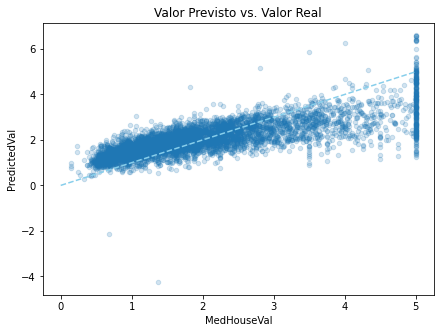

In [86]:
dados_test["PredictedVal"] = gridcv.best_estimator_.predict(X = scaler.transform(dados_test.loc[:, "MedInc":"Longitude"]))

fig, ax = plt.subplots(figsize = (7, 5))
dados_test.plot("MedHouseVal", "PredictedVal", kind = "scatter", alpha = 0.2, ax = ax)
plt.plot([0, 5], [0, 5], linestyle = "dashed", color = "skyblue")
plt.title("Valor Previsto vs. Valor Real");

O gráfico acima mostra uma não-linearidade nos dados. Isso sugere que modelos mais complexos e flexíveis poderiam gerar melhores resultados. Além disso, o modelo não conseguiu prever bem os valores mais altos, próximos a 5.0.

A página [Nested versus non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html) apresenta um ótimo exemplo da importância de não se usar os mesmos dados para otimizar hiperparâmetros e avaliar o desempenho de um modelo, o que caracterizaria o que chamamos de *data leakage*. O exemplo é reproduzido a seguir, com algumas modificações. Note, no gráfico gerado, que há uma tendência de se superestimar o desempenho do modelo quando há *data leakage*.  

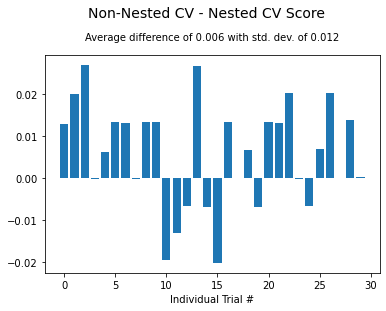

In [87]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays and list to store scores and hiperparameters
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
params = list()

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    grid_cv = KFold(n_splits=4, shuffle=True)
    test_cv = KFold(n_splits=4, shuffle=True)

    # Get best hyperparameters
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=grid_cv)
    clf.fit(X_iris, y_iris)
    params.append(clf.best_params_)
    
    # Non_nested parameter search and scoring
    non_nested_scores[i] = clf.best_score_
    
    # Nested CV with optimum hiperparameters
    #clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=test_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores
subtitle = f"Average difference of {score_difference.mean():.3f} with std. dev. of {score_difference.std():.3f}"

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.bar(range(NUM_TRIALS), score_difference)
plt.suptitle("Non-Nested CV - Nested CV Score", fontsize = "14", y = 1.05)
plt.title(subtitle, fontsize = "10", pad = 15)
plt.xlabel("Individual Trial #")
plt.xticks(np.arange(0, NUM_TRIALS + 1, 5))
plt.show()

In [88]:
# Melhores hiperparâmetros:
df = pd.DataFrame()
for linha in params:
    df = df.append(linha, ignore_index = True)
df.drop_duplicates().reset_index(drop = True)

,C,gamma
0,100.00,0.01
1,10.00,0.10
2,10.00,0.01
3,1.00,0.10


# *Pipelines*

Preprocessadores (*pre-processors*) e estimadores (*estimators*) podem ser combinados e encadeados em objetos do tipo *pipeline* no `scikit-learn`. Assim como os *estimadores*, *pipelines* incluem os métodos `fit` e `predict`.

*Pipelines* facilitam o desenvolvimento de modelos de ML:

 - os métodos `fit` e `predict` podem ser chamados apenas uma vez para todo o conjunto de preprocessadores e estimadores;
 - todos os hiperparâmetros dos estimadores são otimizados de uma só vez;
 - garantimos que as mesmas amostras são usadas para treinar os métodos de transformação e previsão, evitando o que chamamos de *data leakage*.

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LinearRegression

Todos os objetos de um pipeline devem ser preprocessadores ou *transformers*, exceto o último, que pode ser de qualquer tipo.

A instanciação do *pipeline* é feita por meio de uma lista de pares (*chave*, *valor*), que correspondem ao nome que queremos dar a uma etapa e ao elemento do `scikit-learn` correspondente, respectivamente.

In [90]:
etapas = [("minmax", MinMaxScaler()),
          ("dummy", Binarizer()),
          ("modelo", LinearRegression())]
pipe = Pipeline(etapas)
pipe

Pipeline(steps=[('minmax', MinMaxScaler()), ('dummy', Binarizer()),
                ('modelo', LinearRegression())])

In [91]:
# Podemos acessar os elemento que compoem o pipeline:
print("Primeira etapa:", pipe.steps[0])
print("Elemento de ML:", pipe[0])
print()
print("Segunda etapa:", pipe.steps[1])
print("Elemento de ML:", pipe[1])
print()
print("Terceira etapa:", pipe.steps[2])
print("Elemento de ML:", pipe[2])

Primeira etapa: ('minmax', MinMaxScaler())
Elemento de ML: MinMaxScaler()

Segunda etapa: ('dummy', Binarizer())
Elemento de ML: Binarizer()

Terceira etapa: ('modelo', LinearRegression())
Elemento de ML: LinearRegression()


In [92]:
# Acesso com o nome da etapa:
pipe["minmax"]

MinMaxScaler()

In [93]:
# Slicing:
pipe.steps[0:2]

[('minmax', MinMaxScaler()), ('dummy', Binarizer())]

Para acessar os hiperparâmetros dos estimadores, usamos atributos com nome *estimator__parâmetro*:

In [94]:
pipe.set_params(minmax__feature_range = (0, 2), 
                dummy__threshold = .5,
                modelo__fit_intercept = False)

Pipeline(steps=[('minmax', MinMaxScaler(feature_range=(0, 2))),
                ('dummy', Binarizer(threshold=0.5)),
                ('modelo', LinearRegression(fit_intercept=False))])

In [95]:
pipe.get_params()

{'memory': None,
 'steps': [('minmax', MinMaxScaler(feature_range=(0, 2))),
  ('dummy', Binarizer(threshold=0.5)),
  ('modelo', LinearRegression(fit_intercept=False))],
 'verbose': False,
 'minmax': MinMaxScaler(feature_range=(0, 2)),
 'dummy': Binarizer(threshold=0.5),
 'modelo': LinearRegression(fit_intercept=False),
 'minmax__clip': False,
 'minmax__copy': True,
 'minmax__feature_range': (0, 2),
 'dummy__copy': True,
 'dummy__threshold': 0.5,
 'modelo__copy_X': True,
 'modelo__fit_intercept': False,
 'modelo__n_jobs': None,
 'modelo__normalize': 'deprecated',
 'modelo__positive': False}

*Pipelines* podem ser usados em processos de validação cruzada e de otimização de parâmetros. Eles se comportam como estimadores ou transformadores, dependendo do tipo do elemento colocado na última etapa do *pipeline*. 

In [96]:
param_grid = {"minmax__feature_range": [(0, 1), (-1, 1)],
              "dummy": ["passthrough", Binarizer()],
              "modelo__fit_intercept": [True, False]}

grid = GridSearchCV(pipe, param_grid = param_grid)

grid.fit(dados_train.loc[:, "MedInc":"Longitude"], dados_train.loc[:, "MedHouseVal"])

GridSearchCV(estimator=Pipeline(steps=[('minmax',
                                        MinMaxScaler(feature_range=(0, 2))),
                                       ('dummy', Binarizer(threshold=0.5)),
                                       ('modelo',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'dummy': ['passthrough', Binarizer()],
                         'minmax__feature_range': [(0, 1), (-1, 1)],
                         'modelo__fit_intercept': [True, False]})

In [97]:
print(f"Hiperparâmetros ótimos: {grid.best_params_}\n" +
      f"R2 ótimo: {grid.best_score_:.3f}")

Hiperparâmetros ótimos: {'dummy': 'passthrough', 'minmax__feature_range': (-1, 1), 'modelo__fit_intercept': True}
R2 ótimo: 0.481


Note no exemplo acima o uso da opção __*passthrough*__. Ela pode ser usada para evitar que uma etapa seja implementada quando o *pipeline* é rodado. A opção não pode ser usada para a última etapa, no entanto.

# Visualização

Um conjunto de estimadores pode ser visualizado de forma gráfica no Jupyter Notebook por meio do método `set_config`. O diagrama gerado é iterativo: pode-se clicar em um elemento para visualizar seus parâmetros.

In [98]:
from sklearn import set_config
set_config(display='diagram')

In [105]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_bins=3,
                                                                                    strategy='uniform'))]),
                                                  'Population'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ('AveRooms', 'AveBedrms')),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Latitude', 'Longitude'))])),
                ('linearregression', LinearRegression())])

In [100]:
set_config(display = 'text')

In [101]:
pipe

Pipeline(steps=[('minmax', MinMaxScaler(feature_range=(0, 2))),
                ('dummy', Binarizer(threshold=0.5)),
                ('modelo', LinearRegression(fit_intercept=False))])

No exemplo a seguir, usamos os métodos `make_pipeline` e `make_column_transformer`, que funcionam de forma similar a `Pipeline` e `ColumnTransformer`.

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

pipe_discr = make_pipeline(KBinsDiscretizer(n_bins = 3, encode = "onehot-dense", strategy = "uniform"))
pipe_mmx   = make_pipeline(MinMaxScaler())
pipe_pdr   = make_pipeline(StandardScaler())

col_trans = make_column_transformer((pipe_discr, ("Population")),
                                    (pipe_mmx, ("AveRooms", "AveBedrms")),
                                    (pipe_pdr, ("Latitude", "Longitude")))

pipe = make_pipeline(col_trans, LinearRegression())

In [104]:
set_config(display = "diagram")
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_bins=3,
                                                                                    strategy='uniform'))]),
                                                  'Population'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ('AveRooms', 'AveBedrms')),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Latitude', 'Longitude'))])),
                ('linearregression', LinearRegression())])

# Recursos adicionais

O site oficial do `scikit-learn` contém vários exemplos que demonstram na prática conceitos importantes de *Machine Learning*. Seguem os links para alguns deles:

 - [Bias vs. Variância](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html)
 - [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
 - [Regularização e multicolinearidade](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)
 - [Interpretação de coeficientes de regressão linear](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html)
 - [Visualização de resultados](https://scikit-learn.org/stable/visualizations.html)
 - [Visualização do processo de aprendizagem](https://scikit-learn.org/stable/modules/learning_curve.html)
 - [Métricas de avaliação de modelos](https://scikit-learn.org/stable/modules/model_evaluation.html)